In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import pandas as pd
#importing libraries

In [2]:
path = 'cifar-10/train/train/'
images = []
Index = []
for i in range(1,50001):
    filepath = path+str(i)+'.png'
    image = imread(filepath)
    images.append(image)
    Index.append(i)


In [3]:
dict = {'Index': Index, 'Images': images}
df = pd.DataFrame(dict)

In [4]:
train_labels = pd.read_csv('cifar-10/trainLabels.csv')

In [5]:
df.head()

,Index,Images
0,1,"[[[0.23137255, 0.24313726, 0.24705882], [0.168..."
1,2,"[[[0.6039216, 0.69411767, 0.73333335], [0.4941..."
2,3,"[[[1.0, 1.0, 1.0], [0.99215686, 0.99215686, 0...."
3,4,"[[[0.10980392, 0.09803922, 0.039215688], [0.14..."
4,5,"[[[0.6666667, 0.7058824, 0.7764706], [0.658823..."


In [6]:
train_labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [7]:
train_df = pd.merge(df, train_labels, left_on = 'Index', right_on= 'id')

In [8]:
train_df.head()

,Index,Images,id,label
0,1,"[[[0.23137255, 0.24313726, 0.24705882], [0.168...",1,frog
1,2,"[[[0.6039216, 0.69411767, 0.73333335], [0.4941...",2,truck
2,3,"[[[1.0, 1.0, 1.0], [0.99215686, 0.99215686, 0....",3,truck
3,4,"[[[0.10980392, 0.09803922, 0.039215688], [0.14...",4,deer
4,5,"[[[0.6666667, 0.7058824, 0.7764706], [0.658823...",5,automobile


In [9]:
train_df.drop(columns = ['id', 'Index'], inplace=True)

In [10]:
train_df.head()

,Images,label
0,"[[[0.23137255, 0.24313726, 0.24705882], [0.168...",frog
1,"[[[0.6039216, 0.69411767, 0.73333335], [0.4941...",truck
2,"[[[1.0, 1.0, 1.0], [0.99215686, 0.99215686, 0....",truck
3,"[[[0.10980392, 0.09803922, 0.039215688], [0.14...",deer
4,"[[[0.6666667, 0.7058824, 0.7764706], [0.658823...",automobile


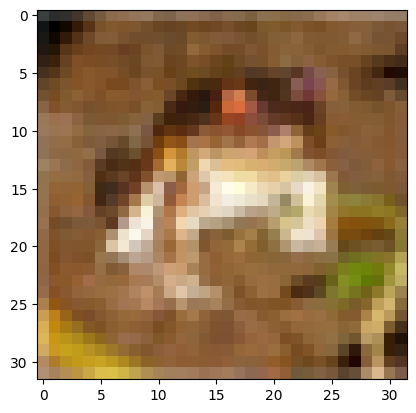

In [11]:
plt.imshow(train_df['Images'][0])

In [12]:
X = []
for i in range(0,len(train_df)):
    temp = train_df['Images'][i].reshape((32,32,3))
    X.append(temp)

In [13]:
from sklearn.preprocessing import LabelEncoder
train_df['label'] = LabelEncoder().fit_transform(train_df['label'])

In [14]:
train_df.head()

,Images,label
0,"[[[0.23137255, 0.24313726, 0.24705882], [0.168...",6
1,"[[[0.6039216, 0.69411767, 0.73333335], [0.4941...",9
2,"[[[1.0, 1.0, 1.0], [0.99215686, 0.99215686, 0....",9
3,"[[[0.10980392, 0.09803922, 0.039215688], [0.14...",4
4,"[[[0.6666667, 0.7058824, 0.7764706], [0.658823...",1


In [15]:
from sklearn.model_selection import train_test_split
X = np.asarray(X)
Y = train_df['label']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

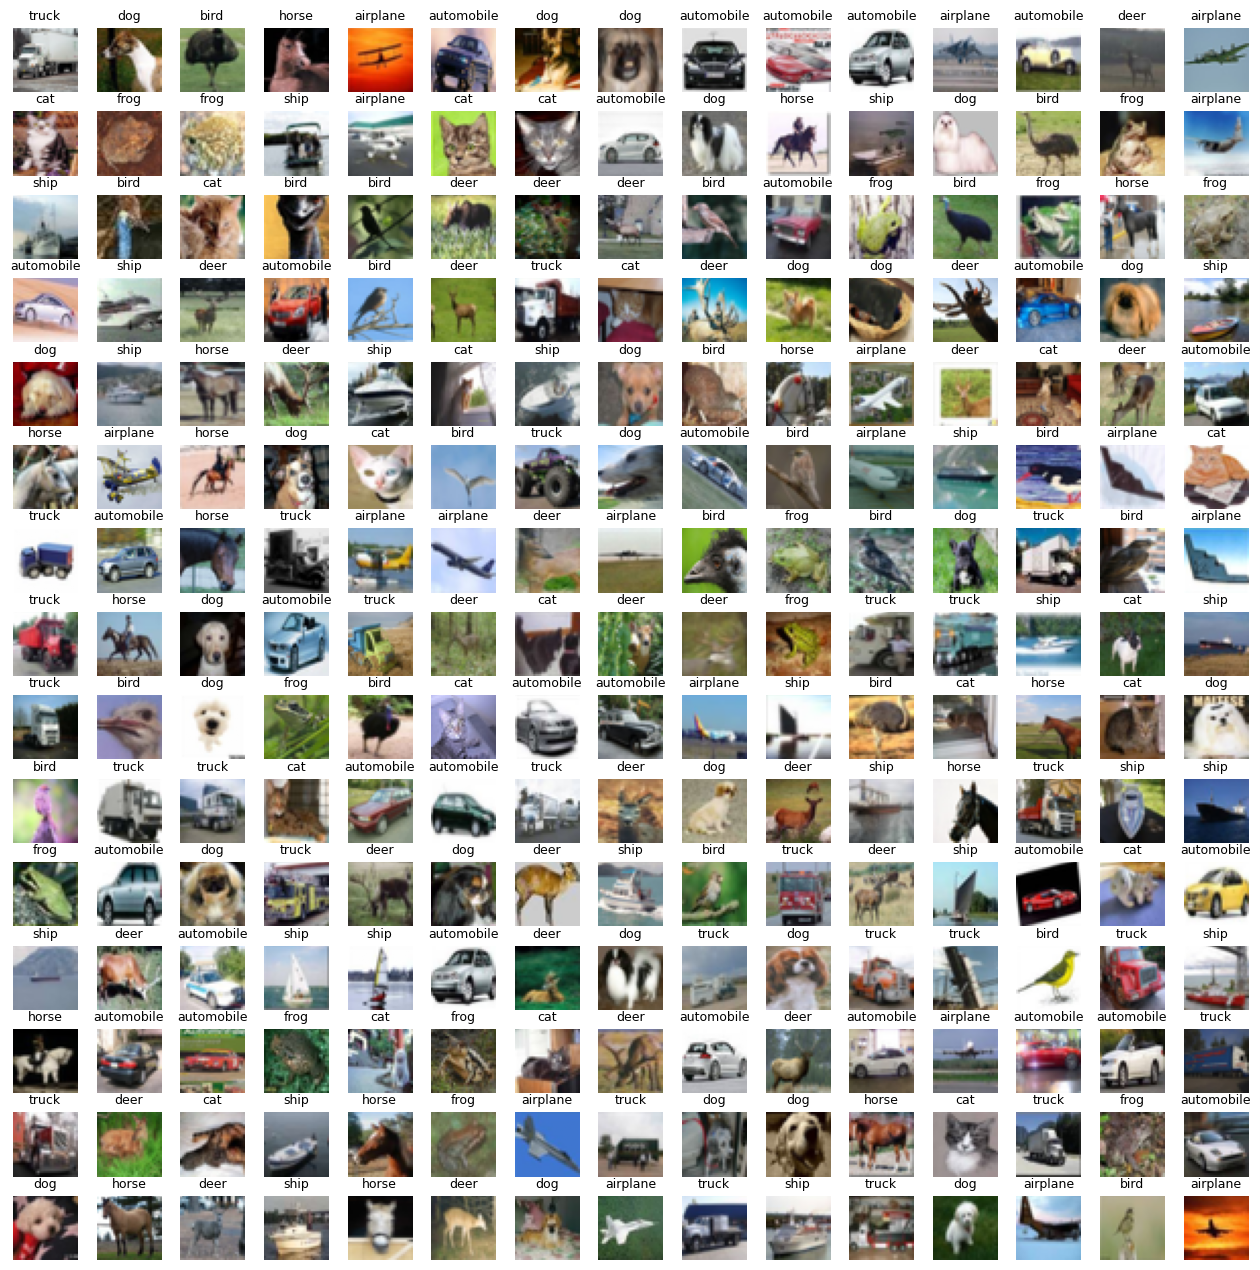

In [16]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_df) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(train_df['Images'][index])
    labelindex = int(train_df['label'][index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
ANN = Sequential([
    Flatten(input_shape = (32,32,3)),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(20, activation = 'softmax')
])

c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
ANN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
ANN_history = ANN.fit(X_train, y_train, epochs = 150)

Epoch 1/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1657 - loss: 2.2631
Epoch 2/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3129 - loss: 1.8977
Epoch 3/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3527 - loss: 1.8071
Epoch 4/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3789 - loss: 1.7380
Epoch 5/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3893 - loss: 1.6871
Epoch 6/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4005 - loss: 1.6566
Epoch 7/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4180 - loss: 1.6168
Epoch 8/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4325 - loss: 1.5912
Epoch 9/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4382 - loss: 1.5709
Epoch 10/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4443 - loss: 1.5445
Epoch 11/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4491 - loss: 1.5327
Epoch 12/150
1250/

In [21]:
from keras.layers import Conv2D, MaxPooling2D
CNN = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    #Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    #MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(20, activation='softmax')
])

c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [23]:
CNN_history = CNN.fit(X_train, y_train, epochs = 150)

Epoch 1/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.1581 - loss: 2.2625
Epoch 2/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3394 - loss: 1.8453
Epoch 3/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3994 - loss: 1.6721
Epoch 4/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4317 - loss: 1.5895
Epoch 5/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4554 - loss: 1.5205
Epoch 6/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4737 - loss: 1.4730
Epoch 7/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4884 - loss: 1.4319
Epoch 8/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.4996 - loss: 1.3921
Epoch 9/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5106 - loss: 1.3706
Epoch 10/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5156 - loss: 1.3460
Epoch 11/150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5287 - loss: 1.31

Text(0.5, 1.0, 'Train - Accuracy ANN')

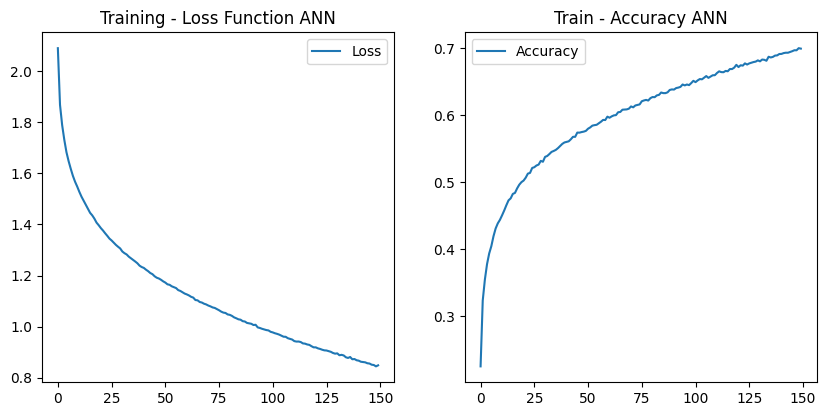

In [24]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(ANN_history.history['loss'], label='Loss')
plt.legend()
plt.title('Training - Loss Function ANN')

plt.subplot(2, 2, 2)
plt.plot(ANN_history.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Train - Accuracy ANN')

Text(0.5, 1.0, 'Train - Accuracy CNN')

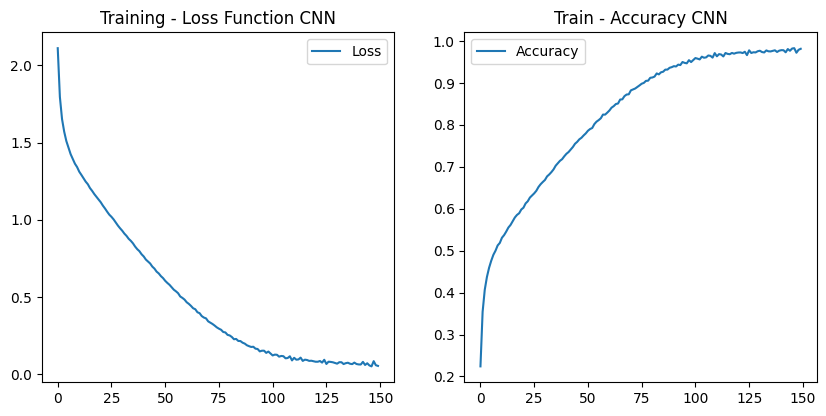

In [25]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(CNN_history.history['loss'], label='Loss')
plt.legend()
plt.title('Training - Loss Function CNN')

plt.subplot(2, 2, 2)
plt.plot(CNN_history.history['accuracy'], label='Accuracy')
plt.legend()
plt.title('Train - Accuracy CNN')

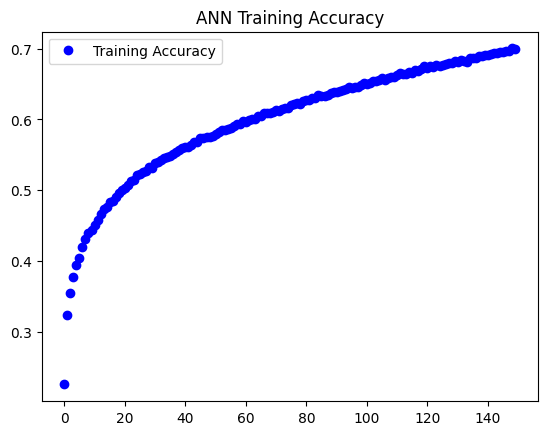

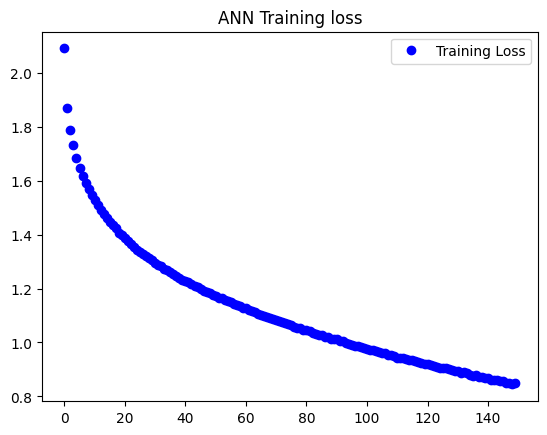

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = ANN_history.history['accuracy']
loss = ANN_history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.title('ANN Training Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.title('ANN Training loss')
plt.legend()
plt.show()

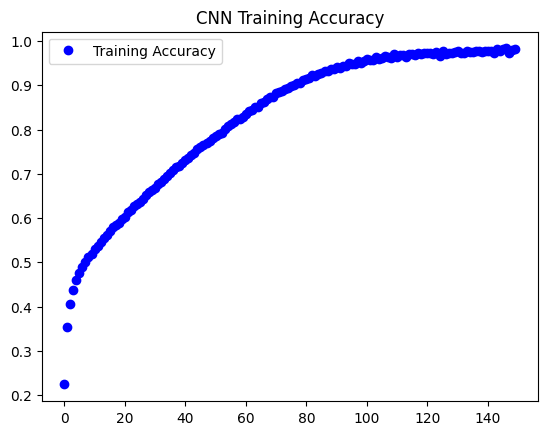

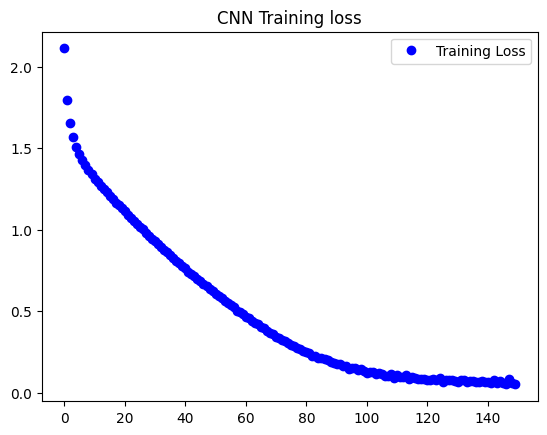

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = CNN_history.history['accuracy']
loss = CNN_history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.title('CNN Training Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.title('CNN Training loss')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report

# Get the predictions for the test data
predicted_probabilities = ANN.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the true labels
y_true = y_test.astype(int)

# Get the indices to be plotted
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

# Print classification report
target_names = ["Class {}".format(i) for i in range(len(class_names))]
print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

     Class 0       0.55      0.60      0.57      1007
     Class 1       0.63      0.63      0.63      1036
     Class 2       0.37      0.43      0.40       994
     Class 3       0.36      0.34      0.35       978
     Class 4       0.42      0.45      0.44       973
     Class 5       0.42      0.44      0.43       999
     Class 6       0.61      0.52      0.56      1015
     Class 7       0.55      0.59      0.57       987
     Class 8       0.69      0.54      0.61      1014
     Class 9       0.56      0.56      0.56       997

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000



In [30]:
from sklearn.metrics import classification_report

# Get the predictions for the test data
predicted_probabilities = CNN.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Get the true labels
y_true = y_test.astype(int)

# Get the indices to be plotted
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

# Print classification report
target_names = ["Class {}".format(i) for i in range(len(class_names))]
print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

     Class 0       0.62      0.59      0.61      1007
     Class 1       0.72      0.66      0.69      1036
     Class 2       0.44      0.43      0.44       994
     Class 3       0.36      0.37      0.37       978
     Class 4       0.48      0.45      0.47       973
     Class 5       0.41      0.48      0.45       999
     Class 6       0.60      0.59      0.59      1015
     Class 7       0.64      0.58      0.61       987
     Class 8       0.67      0.71      0.69      1014
     Class 9       0.61      0.64      0.63       997

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000

